# Results Cell2Loc

### Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

### Data

In [2]:
OUTPUT_FOLDER = '/scratch/jeremy/plots/cell2loc/runai/'
INPUT_FOLDER  = '/scratch/jeremy/runs/cell2loc/runai/train_logs/'
EPOCH_TOKEN   = 'epoch'
PASS_TOKEN    = 'Namespace'
EVAL_LIST     = ['test1','test2','hippocampus']
TRAIN_TOKEN   = 'TRAIN'
EVAL_TOKEN    = 'EVAL'
FULL_LIST     = ['train'] + EVAL_LIST
METRICS       = ['loss','acc']
files_dict    = {'p2p [train]':'p2p.log','p2p_hic [train]':'p2p_and_hic.log',
                'p2p_hic [raw]':'p2p_and_hic_raw.log', 'p2p_hic_restricted [raw]':'p2p_and_hic_raw_restricted.log'}
EXP_NAMES     = list(files_dict.keys())

### Helpers

In [3]:
def init_data() -> dict:
    """
    """
    return {"train_loss":[],"test1_loss":[],"test2_loss":[], "hippocampus_loss":[],
            "train_acc":[],"test1_acc":[],"test2_acc":[], "hippocampus_acc":[]}

def parse_field(line:str) -> dict:
    """
    """
    field_data = line.strip().split('{')
    return json.loads(('{'+field_data[1]).replace('\'',"\""))

def parse_epoch(line:str, file, data:dict):
    """
    """
    train_data = parse_field(line)
    data['train_loss'].append(train_data['loss'])
    data['train_acc'].append(train_data['acc'])
    # Parse eval fields
    line = file.readline()
    while TRAIN_TOKEN not in line and len(line) != 0:
        if EVAL_TOKEN in line:
            eval_data = parse_field(line)
            data[eval_data['name']+'_loss'].append(eval_data['loss'])
            data[eval_data['name']+'_acc'].append(eval_data['acc'])
        line = file.readline()
        
        

def parse_data(file_path:str) -> dict:
    """
    """
    with open(file_path,'r') as f:
        line = f.readline()
        data = init_data()
        while len(line) != 0:
            if EPOCH_TOKEN in line and PASS_TOKEN not in line:
                parse_epoch(line,f,data)
            line = f.readline()
    return data

def make_exp_plot(data:dict, metric:str, exp_name:str,
                  output_folder:str, max_range=-1):
    """
    """
    fig,ax = plt.subplots(figsize=(8,8))
    for prefix in FULL_LIST:
        plot_data = data[prefix+'_'+metric][:max_range]
        plt.plot(range(len(plot_data)),plot_data,label=prefix)
    fig.suptitle(f"{metric} for experience {exp_name}")
    ax.set_xlabel('epoch')
    ax.set_ylabel(metric)
    ax.legend()
    fig.savefig(output_folder+metric+'.png')
    
def make_eval_plot(data:dict, metric:str, eval_set:str, 
                   output_folder:str, max_range=-1):
    """
    """
    fig,ax = plt.subplots(figsize=(8,8))
    for exp_name in EXP_NAMES:
        plot_data = data[exp_name][eval_set+'_'+metric][:max_range]
        plt.plot(range(len(plot_data)),plot_data,label=exp_name)
    fig.suptitle(f"{metric} on {eval_set}")
    ax.set_xlabel('epoch')
    ax.set_ylabel(metric)
    ax.legend()
    fig.savefig(output_folder+eval_set+'_'+metric+'.png')

In [4]:
def exp_pipeline(max_range=-1):
    """
    """
    for exp_name, file_name in files_dict.items():
        exp_data = parse_data(INPUT_FOLDER+file_name)
        exp_output_folder = OUTPUT_FOLDER+exp_name+"/"
        try:
            os.mkdir(exp_output_folder)
        except:
            pass
        for metric in METRICS:
            make_exp_plot(exp_data,metric,exp_name,
                          exp_output_folder,max_range)

In [5]:
def metric_pipeline(max_range=-1):
    """
    """
    exp_data = dict()
    for exp_name, file_name in files_dict.items():
            exp_data[exp_name] = parse_data(INPUT_FOLDER+file_name)
    for eval_set in FULL_LIST:
        eval_output_folder = OUTPUT_FOLDER+eval_set+"/"
        try:
            os.mkdir(eval_output_folder)
        except:
                pass
        for metric in METRICS:
            make_eval_plot(exp_data,metric,eval_set,
                           eval_output_folder,max_range)

### Plots

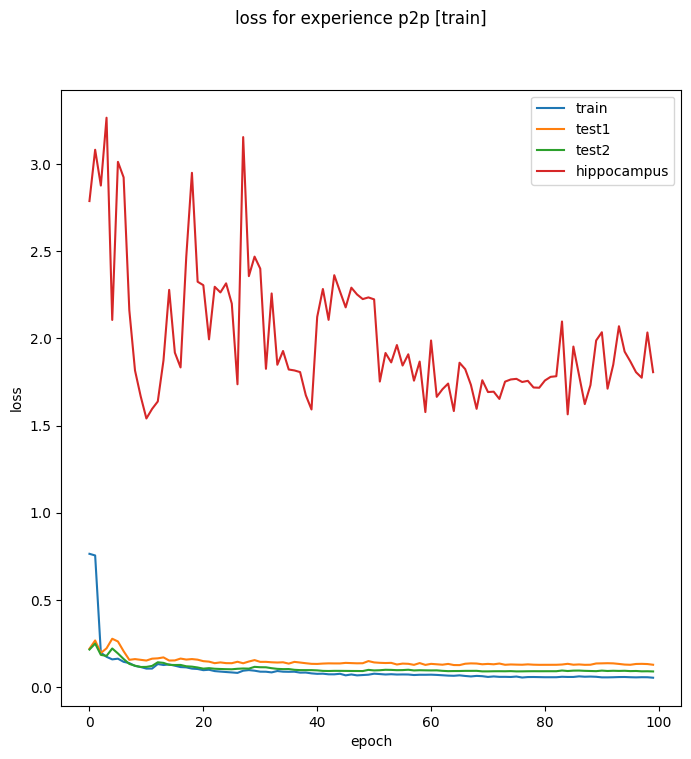

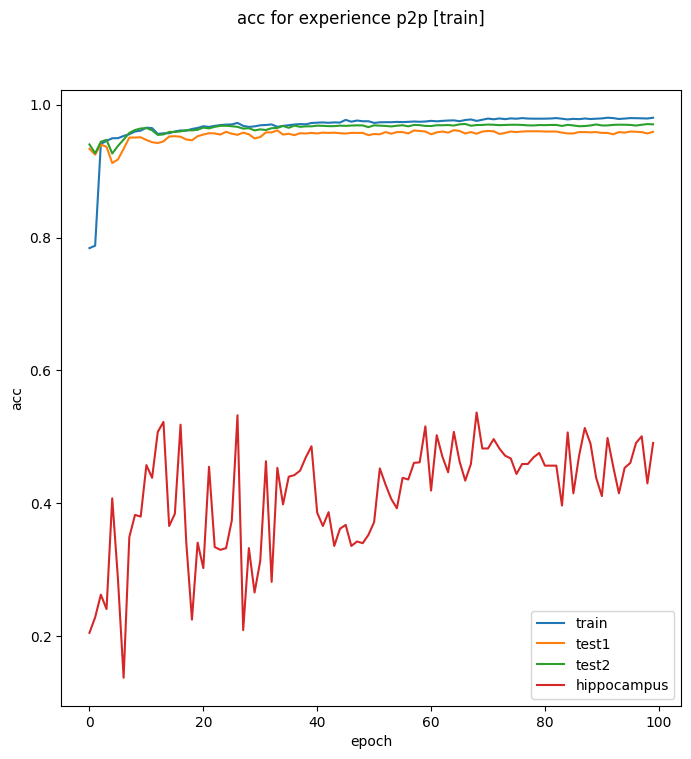

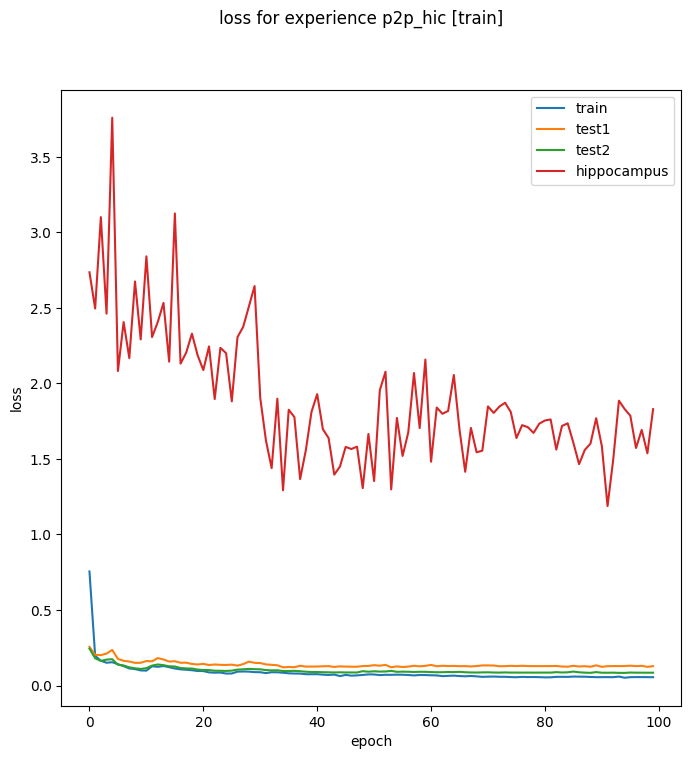

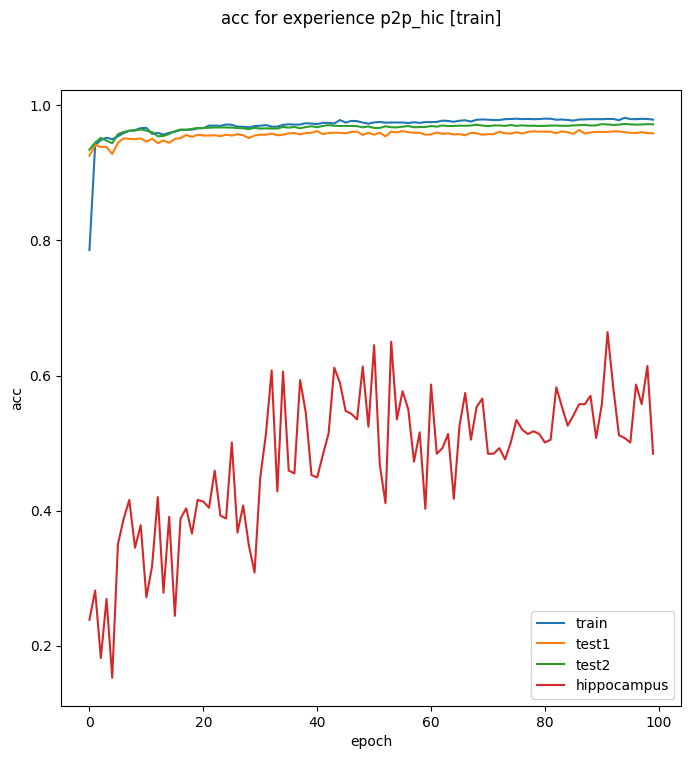

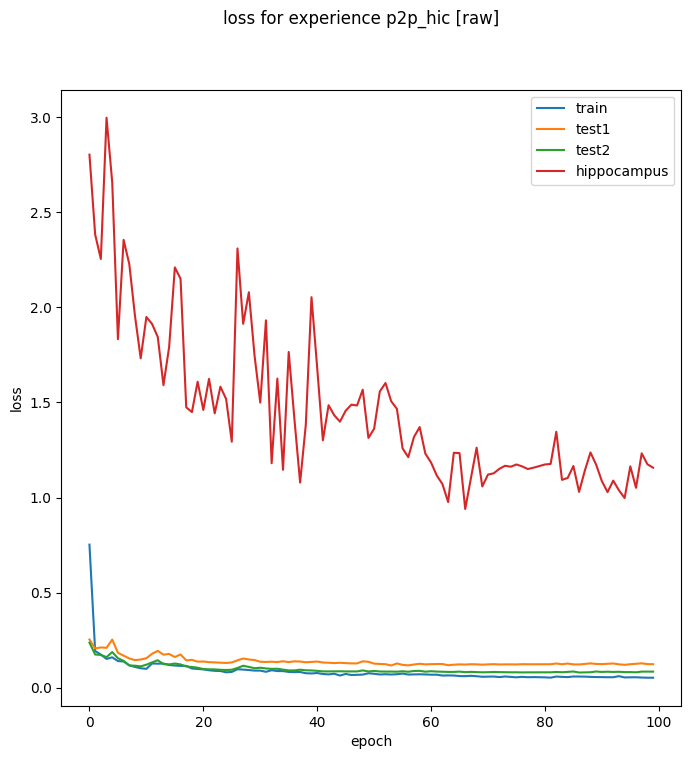

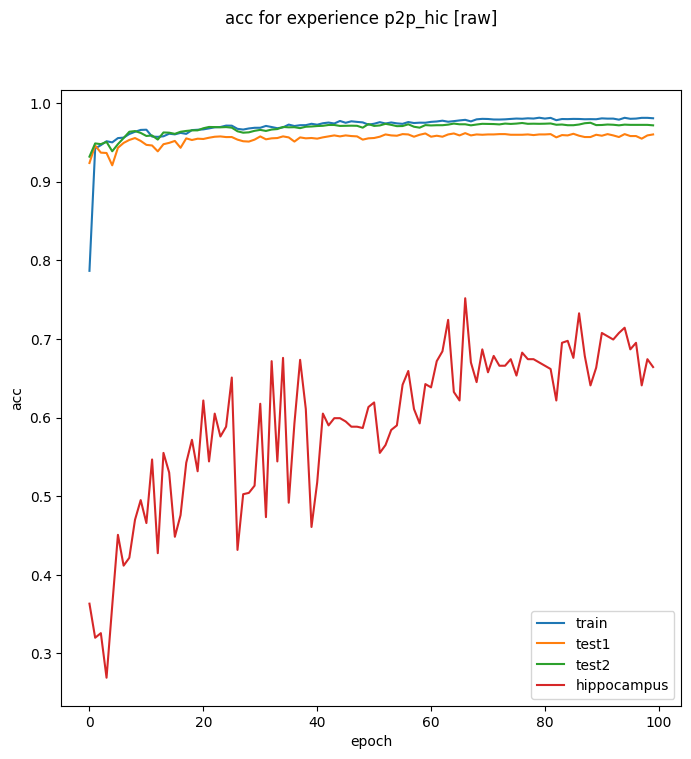

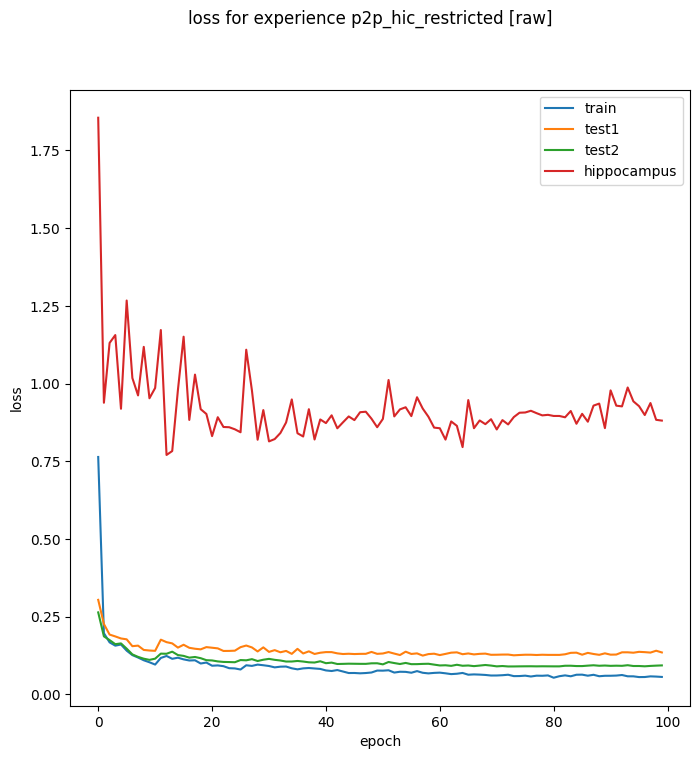

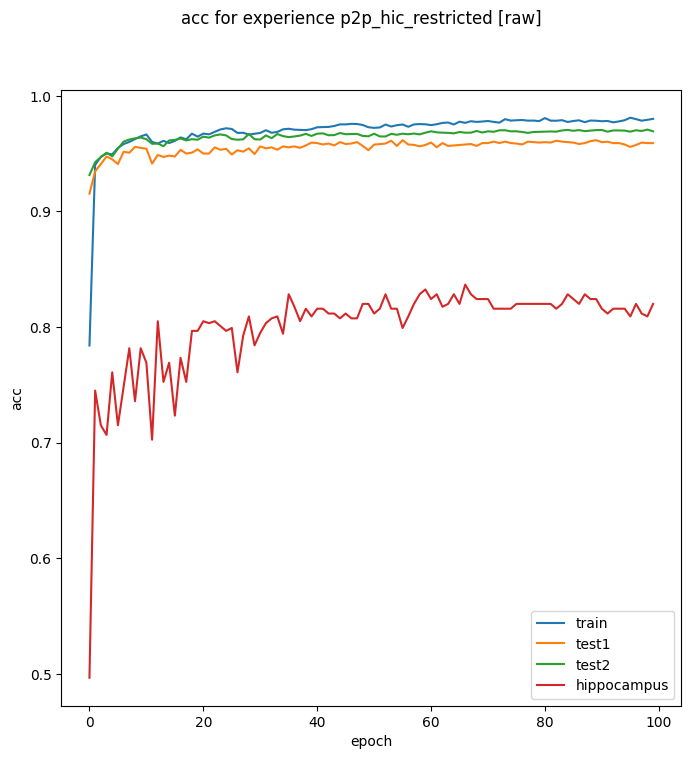

In [11]:
exp_pipeline(max_range=100)

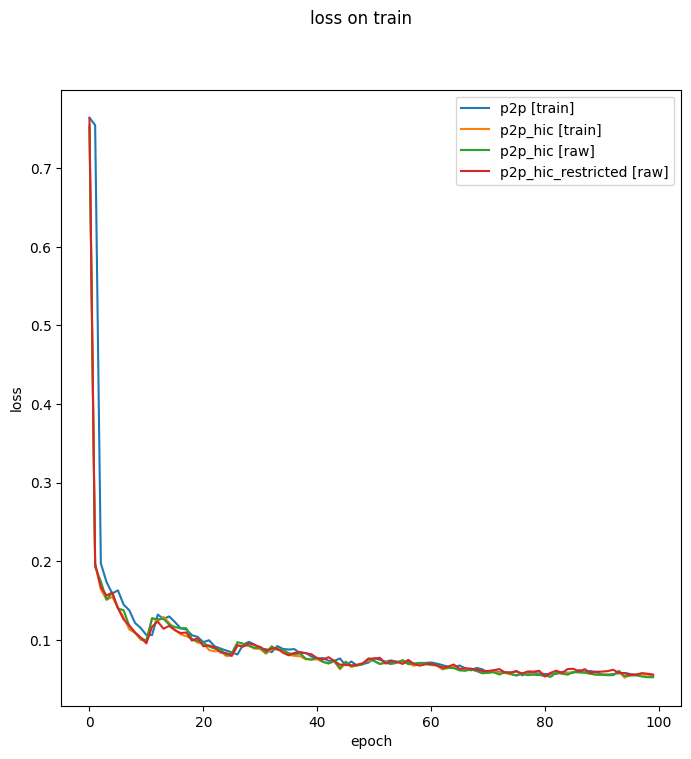

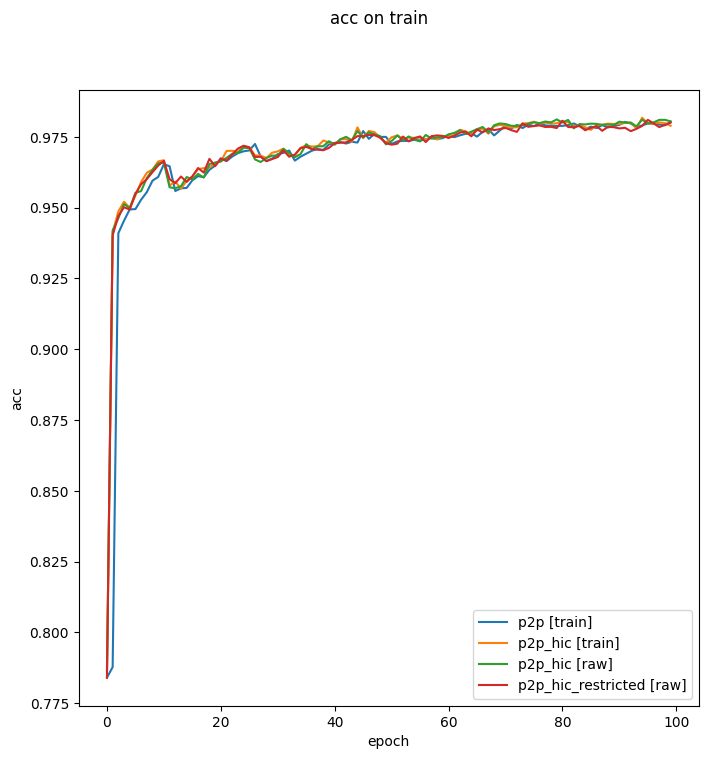

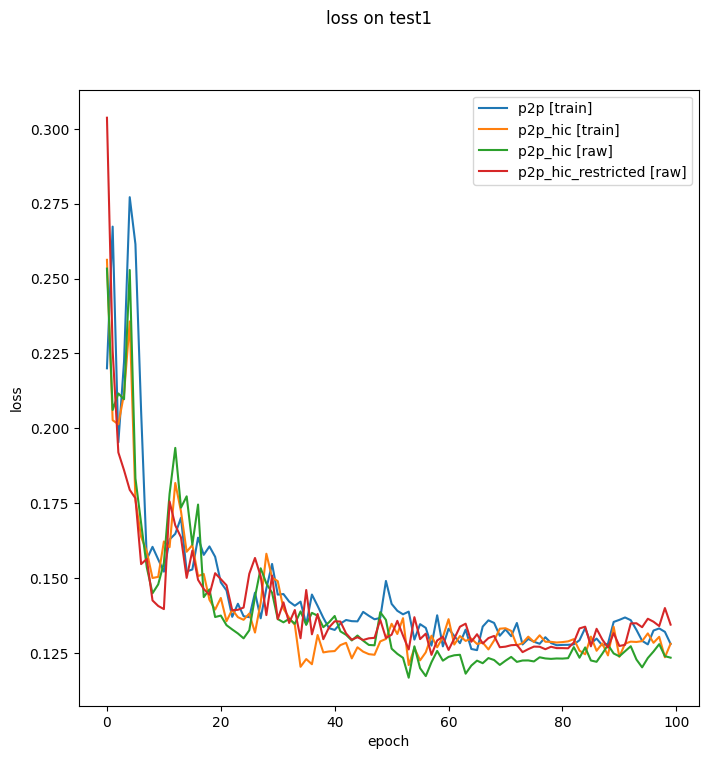

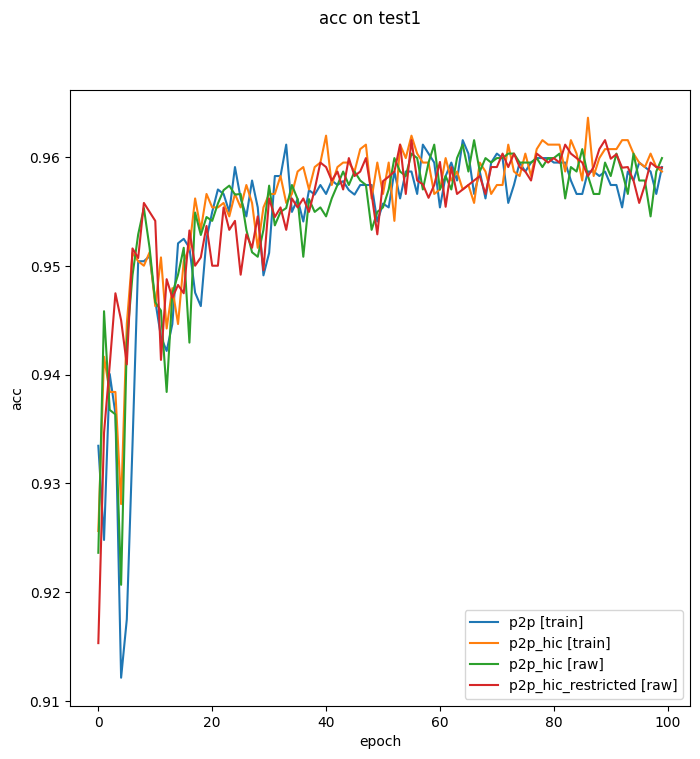

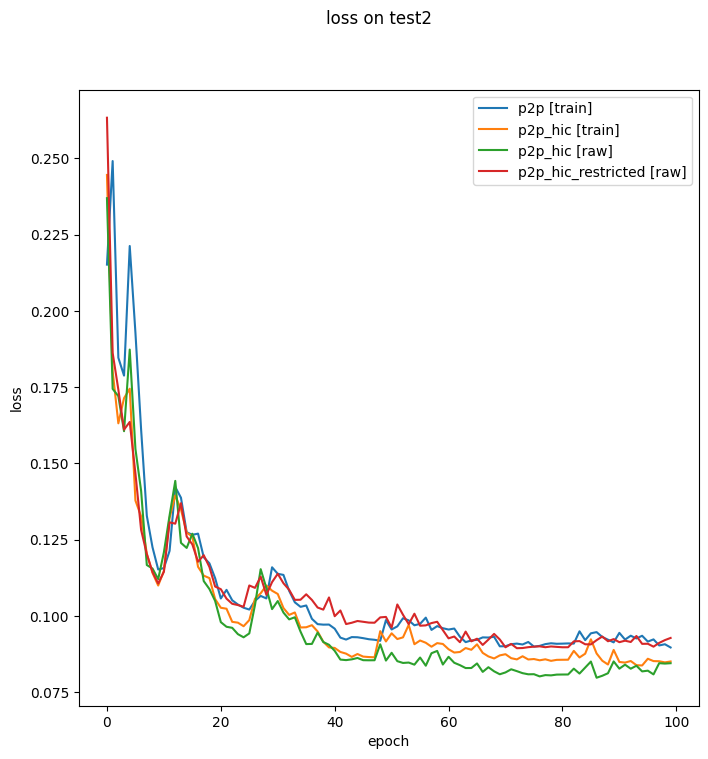

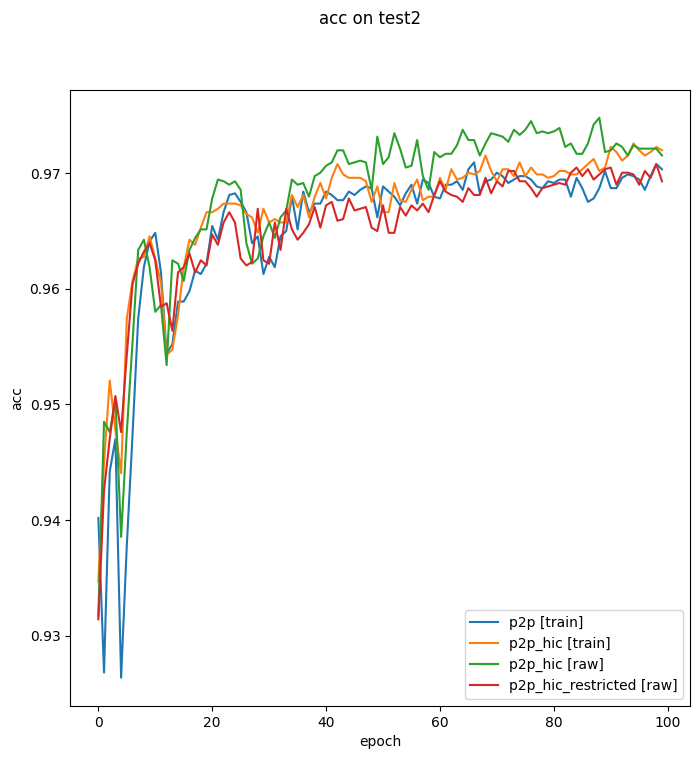

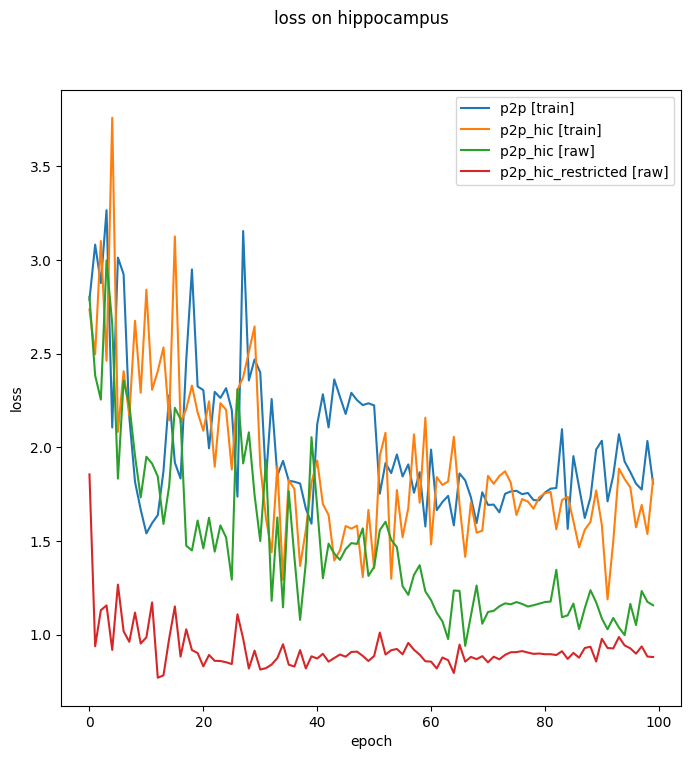

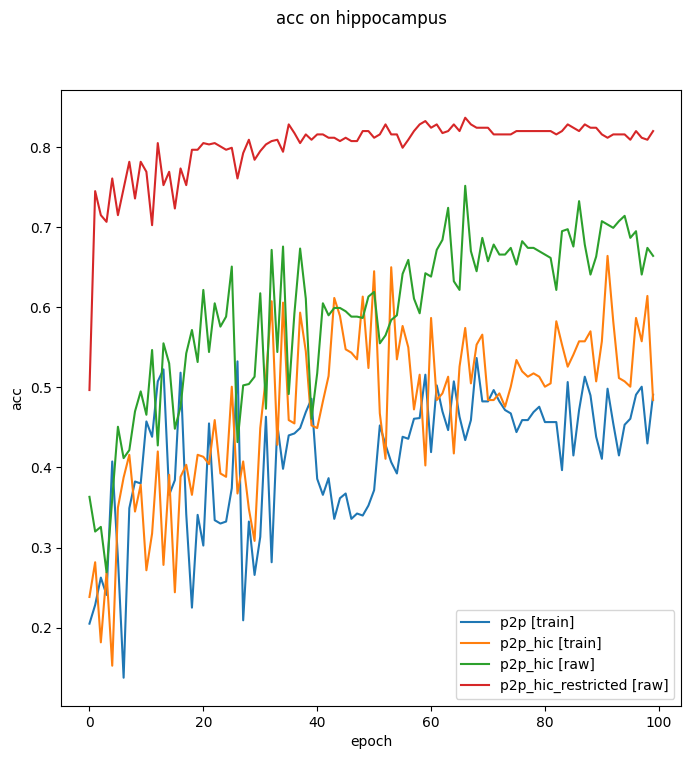

In [12]:
metric_pipeline(max_range=100)

---

### Data

In [2]:
OUTPUT_FOLDER = '/scratch/jeremy/plots/cell2loc/runai_bin/'
INPUT_FOLDER  = '/scratch/jeremy/runs/cell2loc/runai/train_logs/binning/'
EPOCH_TOKEN   = 'epoch'
PASS_TOKEN    = 'Namespace'
EVAL_LIST     = ['test1','test2','hippocampus_1','hippocampus_2','hippocampus_4']
TRAIN_TOKEN   = 'TRAIN'
EVAL_TOKEN    = 'EVAL'
FULL_LIST     = ['train'] + EVAL_LIST
METRICS       = ['loss','acc']
files_dict    = {'bin=5':'raw_no_prior_percentile_5.log','bin=7':'raw_no_prior_percentile_7.log',
                'bin=10':'raw_no_prior_percentile_10.log','prior_bin=5':'raw_percentile_5.log',
                'prior_bin=7':'raw_percentile_7.log','prior_bin=10':'raw_percentile_10.log'}
EXP_NAMES     = list(files_dict.keys())

### Helpers

In [7]:
def init_data() -> dict:
    """
    """
    return {"train_loss":[],"test1_loss":[],"test2_loss":[], "hippocampus_1_loss":[],
            "hippocampus_2_loss":[], "hippocampus_4_loss":[],
            "train_acc":[],"test1_acc":[],"test2_acc":[], "hippocampus_1_acc":[],
            "hippocampus_2_acc":[], "hippocampus_4_acc":[]}

def parse_field(line:str) -> dict:
    """
    """
    field_data = line.strip().split('{')
    return json.loads(('{'+field_data[1]).replace('\'',"\""))

def parse_epoch(line:str, file, data:dict):
    """
    """
    train_data = parse_field(line)
    data['train_loss'].append(train_data['loss'])
    data['train_acc'].append(train_data['acc'])
    # Parse eval fields
    line = file.readline()
    while TRAIN_TOKEN not in line and len(line) != 0:
        if EVAL_TOKEN in line:
            eval_data = parse_field(line)
            data[eval_data['name']+'_loss'].append(eval_data['loss'])
            data[eval_data['name']+'_acc'].append(eval_data['acc'])
        line = file.readline()
        
        

def parse_data(file_path:str) -> dict:
    """
    """
    with open(file_path,'r') as f:
        line = f.readline()
        data = init_data()
        while len(line) != 0:
            if EPOCH_TOKEN in line and PASS_TOKEN not in line:
                parse_epoch(line,f,data)
            line = f.readline()
    return data

def make_exp_plot(data:dict, metric:str, exp_name:str,
                  output_folder:str, max_range=-1):
    """
    """
    fig,ax = plt.subplots(figsize=(8,8))
    for prefix in FULL_LIST:
        plot_data = data[prefix+'_'+metric][:max_range]
        plt.plot(range(len(plot_data)),plot_data,label=prefix)
    fig.suptitle(f"{metric} for experience {exp_name}")
    ax.set_xlabel('epoch')
    ax.set_ylabel(metric)
    ax.legend()
    fig.savefig(output_folder+metric+'.png')
    
def make_eval_plot(data:dict, metric:str, eval_set:str, 
                   output_folder:str, max_range=-1):
    """
    """
    fig,ax = plt.subplots(figsize=(8,8))
    for exp_name in EXP_NAMES:
        plot_data = data[exp_name][eval_set+'_'+metric][:max_range]
        plt.plot(range(len(plot_data)),plot_data,label=exp_name)
    fig.suptitle(f"{metric} on {eval_set}")
    ax.set_xlabel('epoch')
    ax.set_ylabel(metric)
    ax.legend()
    fig.savefig(output_folder+eval_set+'_'+metric+'.png')

In [8]:
def exp_pipeline(max_range=-1):
    """
    """
    for exp_name, file_name in files_dict.items():
        exp_data = parse_data(INPUT_FOLDER+file_name)
        exp_output_folder = OUTPUT_FOLDER+exp_name+"/"
        try:
            os.mkdir(exp_output_folder)
        except:
            pass
        for metric in METRICS:
            make_exp_plot(exp_data,metric,exp_name,
                          exp_output_folder,max_range)

In [9]:
def metric_pipeline(max_range=-1):
    """
    """
    exp_data = dict()
    for exp_name, file_name in files_dict.items():
            exp_data[exp_name] = parse_data(INPUT_FOLDER+file_name)
    for eval_set in FULL_LIST:
        eval_output_folder = OUTPUT_FOLDER+eval_set+"/"
        try:
            os.mkdir(eval_output_folder)
        except:
                pass
        for metric in METRICS:
            make_eval_plot(exp_data,metric,eval_set,
                           eval_output_folder,max_range)

In [11]:
def no_plot_pipeline(max_range=-1):
    """
    """
    max_dict = dict()
    exp_data = dict()
    for exp_name, file_name in files_dict.items():
        exp_data[exp_name] = parse_data(INPUT_FOLDER+file_name)
        for eval_set in FULL_LIST:
            entry_name = '_'.join([exp_name,eval_set,'acc'])
            max_dict[entry_name] = np.max(exp_data[exp_name][eval_set+'_acc'])
    return max_dict

In [12]:
no_plot_pipeline(max_range=100)

{'bin=5_train_acc': 0.9431505994005994,
 'bin=5_test1_acc': 0.94301,
 'bin=5_test2_acc': 0.948189,
 'bin=5_hippocampus_1_acc': 0.861667,
 'bin=5_hippocampus_2_acc': 0.836667,
 'bin=5_hippocampus_4_acc': 0.644167,
 'bin=7_train_acc': 0.9352834665334665,
 'bin=7_test1_acc': 0.941419,
 'bin=7_test2_acc': 0.947595,
 'bin=7_hippocampus_1_acc': 0.845,
 'bin=7_hippocampus_2_acc': 0.795,
 'bin=7_hippocampus_4_acc': 0.759167,
 'bin=10_train_acc': 0.946491008991009,
 'bin=10_test1_acc': 0.947548,
 'bin=10_test2_acc': 0.957987,
 'bin=10_hippocampus_1_acc': 0.849167,
 'bin=10_hippocampus_2_acc': 0.59,
 'bin=10_hippocampus_4_acc': 0.4025,
 'prior_bin=5_train_acc': 0.940777972027972,
 'prior_bin=5_test1_acc': 0.942185,
 'prior_bin=5_test2_acc': 0.946853,
 'prior_bin=5_hippocampus_1_acc': 0.86,
 'prior_bin=5_hippocampus_2_acc': 0.799167,
 'prior_bin=5_hippocampus_4_acc': 0.744167,
 'prior_bin=7_train_acc': 0.949050949050949,
 'prior_bin=7_test1_acc': 0.957037,
 'prior_bin=7_test2_acc': 0.961401,
 'pr

### Plots

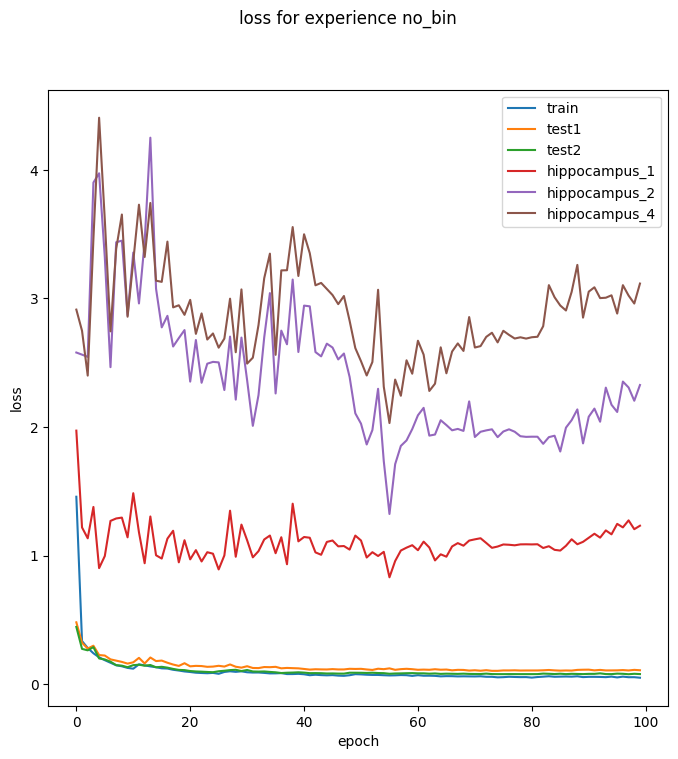

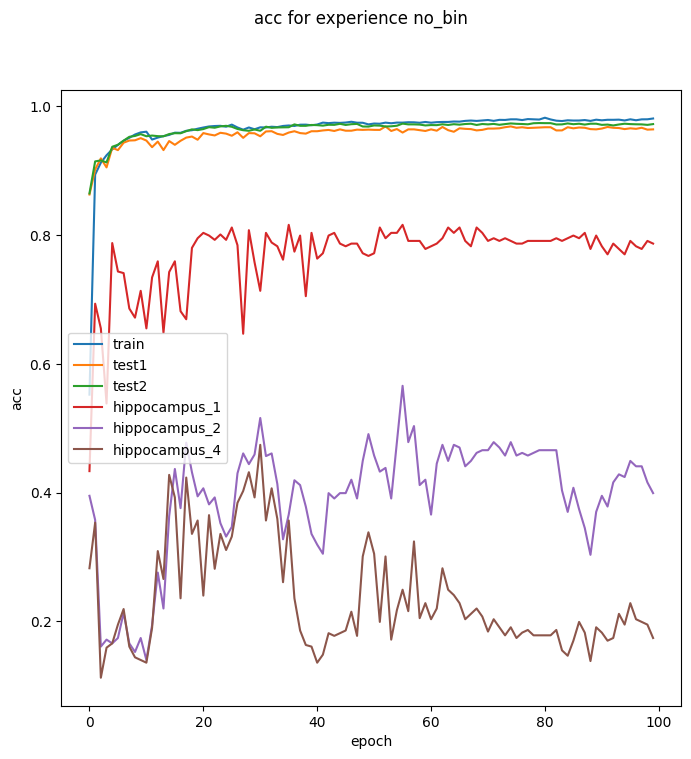

In [27]:
exp_pipeline(max_range=100)

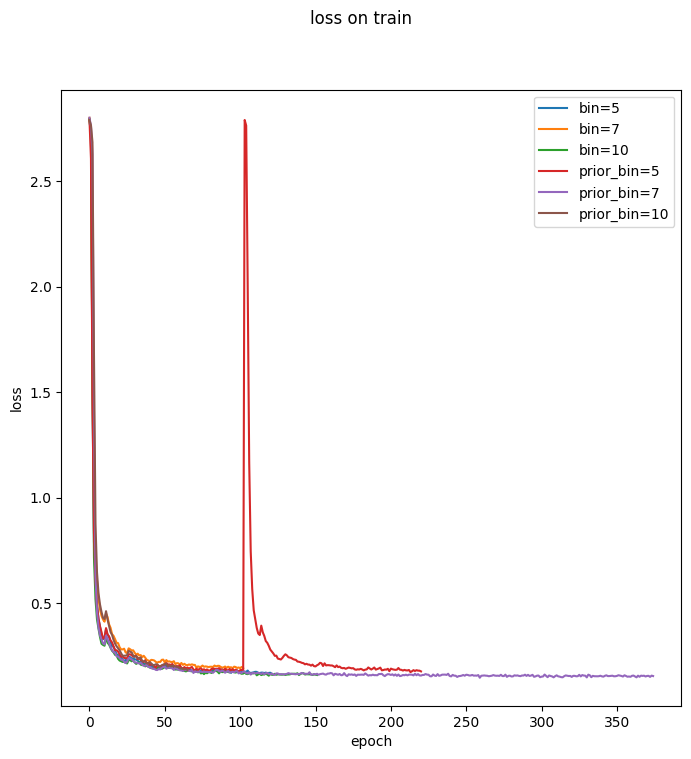

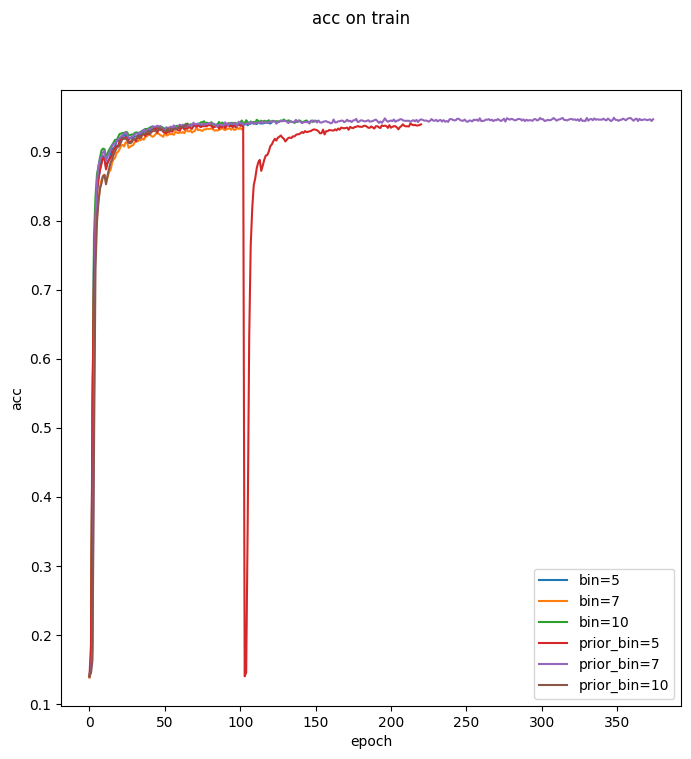

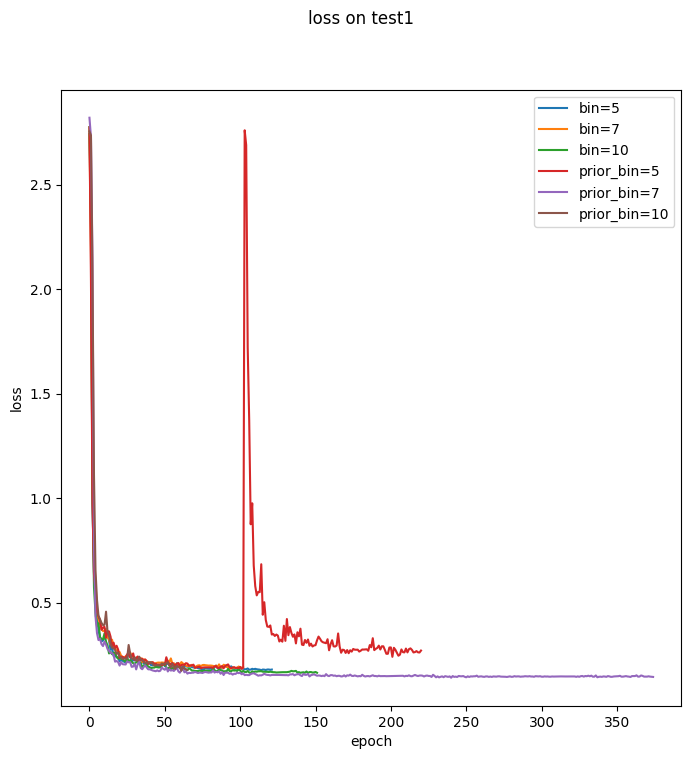

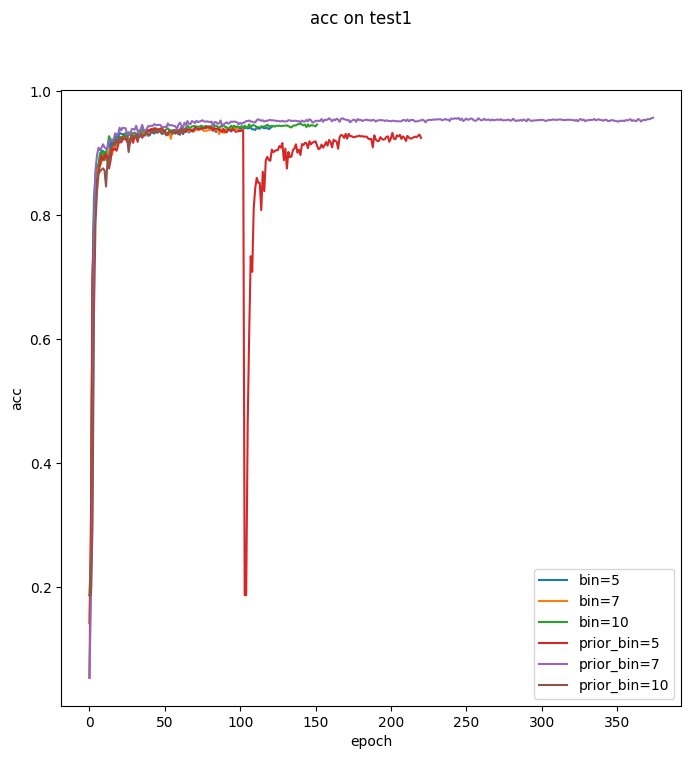

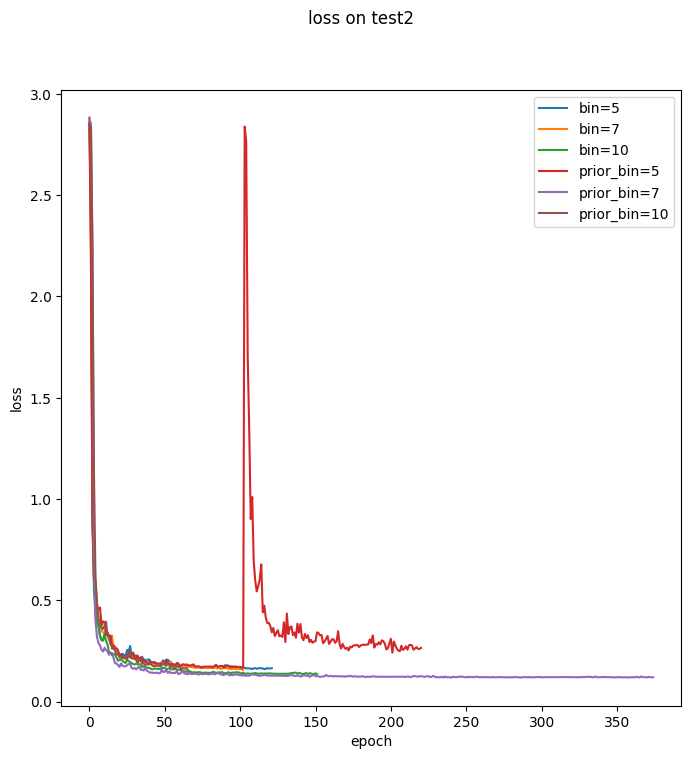

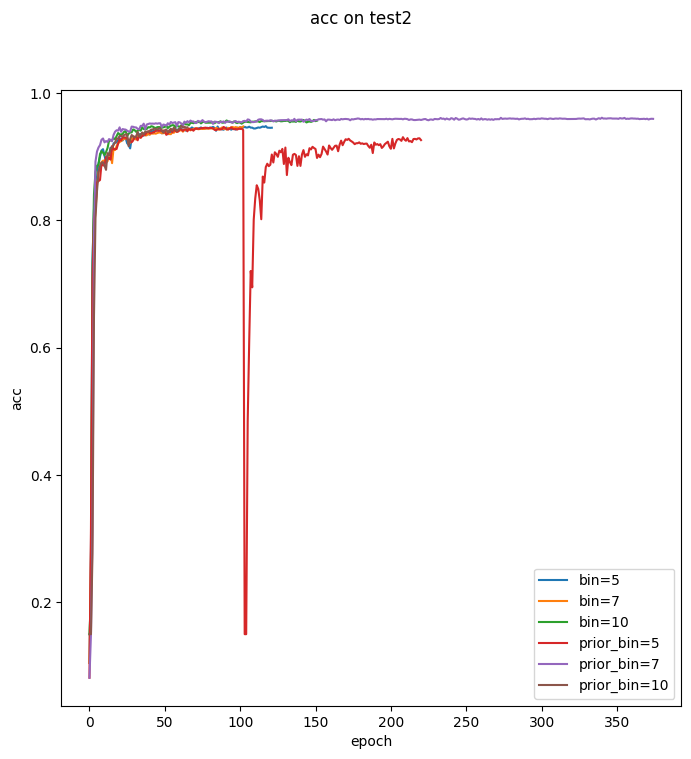

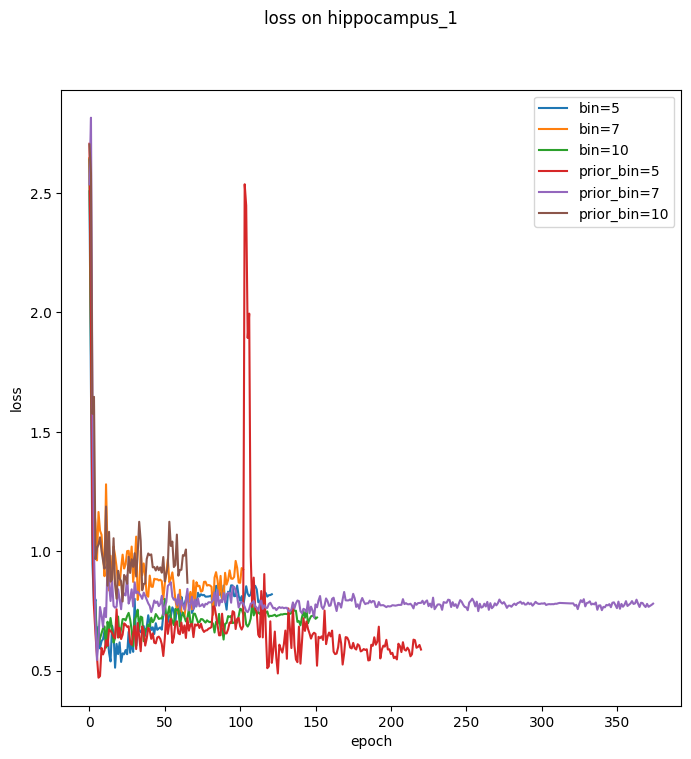

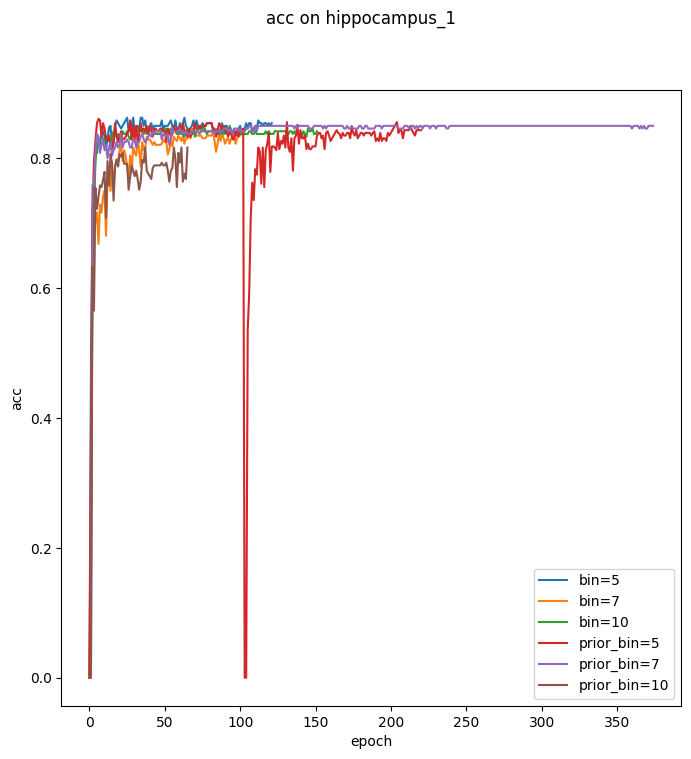

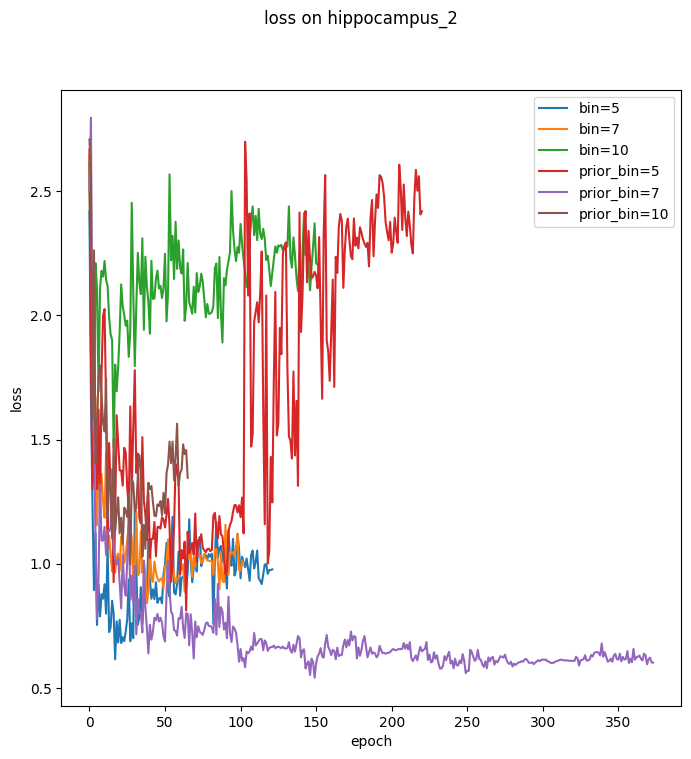

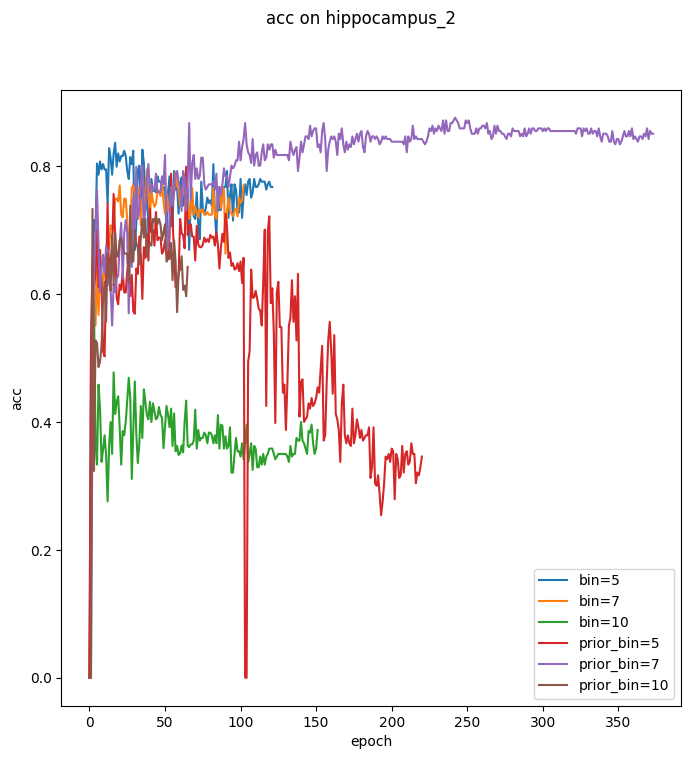

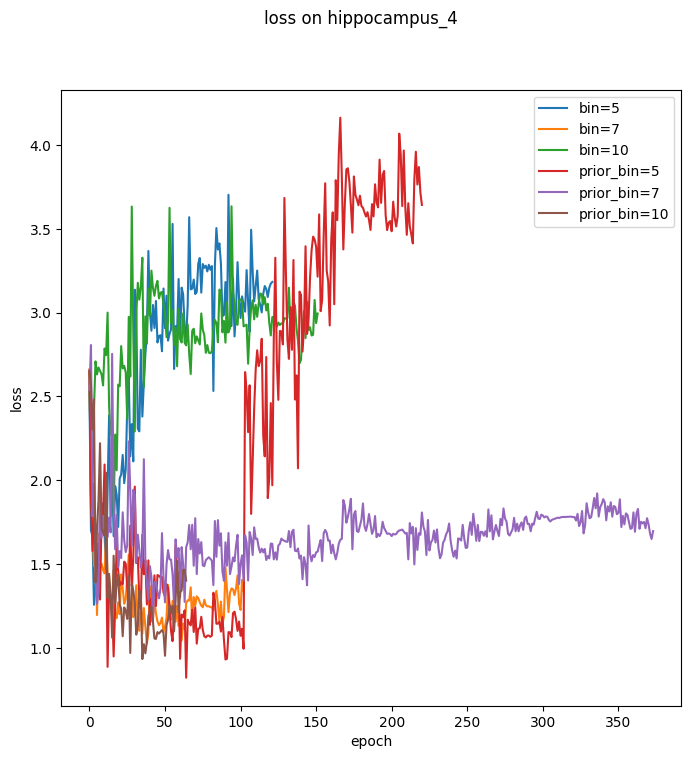

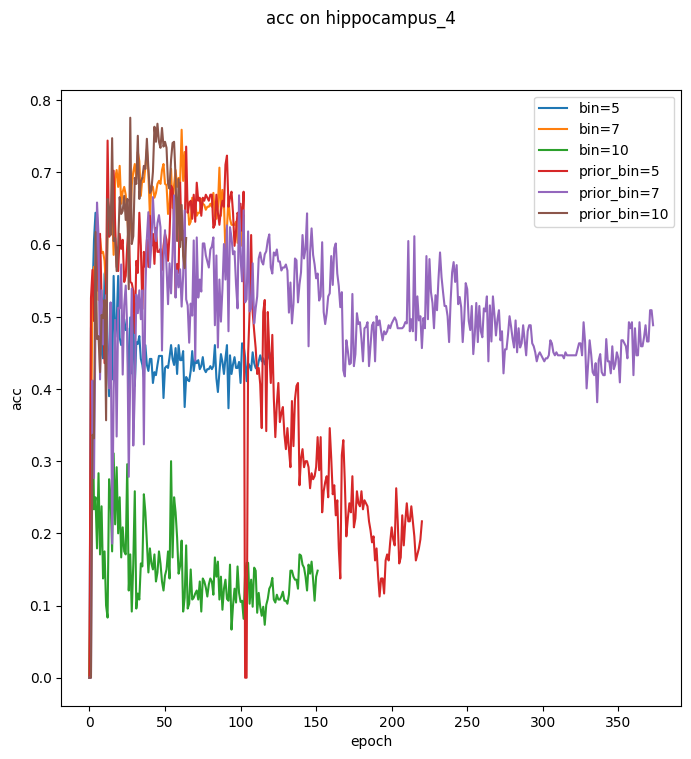

In [10]:
metric_pipeline(max_range=-1)

---